# Extraccion de datos de las pruebas de audicion.

Como primer paso instalamos las librerias necesarias para realizar el procesos ETL.

In [1]:
# Instalar paquetes necesarios (ejecutar solo la primera vez)
# test push
using Pkg
# Pkg.add(["DataFrames", "CSV", "Dates", "JSON3", "Logging", "Statistics"])

# Cargar librerías
using DataFrames        # Manipulación y análisis de datos
using CSV              # Lectura y escritura de archivos CSV
using Dates            # Manejo de fechas y tiempos
using JSON3            # Manejo de datos JSON
using Logging          # Sistema de logs
using Statistics       # Funciones estadísticas básicas

# Configuración de logging para monitorear el pipeline
logger = ConsoleLogger(stdout, Logging.Info)
global_logger(logger)

println("✅ Librerías cargadas exitosamente")

ArgumentError: ArgumentError: Package JSON3 not found in current path.
- Run `import Pkg; Pkg.add("JSON3")` to install the JSON3 package.

# Instalar paquetes necesarios (ejecutar solo la primera vez)
# Pkg.add(["DataFrames", "CSV", "Dates", "JSON3", "Logging", "Statistics"])

# Cargar librerías


In [2]:
df = CSV.read("..\\data\\raw\\Paper1_WebData_Final.csv", DataFrame) 
println("✅ Datos cargados exitosamente")

✅ Datos cargados exitosamente


# 1. Extracción de datos
Como primer paso del proceso ETL (Extracción, Transformación y Carga), se procede a extraer la información más relevante desde nuestra base de datos. Esta etapa consiste en identificar y recuperar los datos necesarios que serán utilizados en las siguientes fases del proceso, asegurando que se obtenga información precisa y útil para el análisis posterior.

# Primer vistazo a los datos

Antes de realizar cualquier transformación, es útil observar una muestra de los datos contenidos en la base de datos. Para ello, utilizamos la función first, que nos permite visualizar las primeras filas del DataFrame y así tener una idea general de su contenido, estructura y posibles inconsistencias.

In [15]:
# Mostrar las primeras 20 filas del DataFrame
first(df, 20)

Row,test_date,nid,L500k,L1k,L2k,L3k,L4k,L6k,L8k,R500k,R1k,R2k,R3k,R4k,R6k,R8k,gender,naics,age_group,region,NAICS_descr
,String15,Int64,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,String1?,Int64,Int64,String3?,String
1,12-FEB-2007,1,10,5,5,15,5,0,20,20,20,10,10,25,30,45,M,331512,4,MA,Steel Investment Foundries
2,29-FEB-2008,2,15,5,15,20,20,15,15,10,0,10,15,30,20,15,M,331512,3,MA,Steel Investment Foundries
3,08-FEB-2006,3,25,20,15,20,35,25,15,20,20,10,15,40,30,30,M,331512,3,MA,Steel Investment Foundries
4,29-FEB-2008,6,10,10,10,35,50,30,10,10,10,5,30,35,25,20,M,331512,4,MA,Steel Investment Foundries
5,08-FEB-2006,8,15,15,5,15,45,30,20,15,15,5,40,50,20,5,M,331512,3,MA,Steel Investment Foundries
6,29-FEB-2008,9,10,5,0,5,15,15,15,5,0,5,5,5,5,20,M,331512,3,MA,Steel Investment Foundries
7,29-FEB-2008,10,5,0,5,5,5,10,0,10,5,5,5,5,5,0,M,331512,2,MA,Steel Investment Foundries
8,29-FEB-2008,11,30,20,25,60,60,60,30,25,20,35,65,65,70,50,M,331512,5,MA,Steel Investment Foundries
9,29-FEB-2008,12,15,10,5,5,35,20,5,10,15,5,25,40,10,20,M,331512,3,MA,Steel Investment Foundries


# Columnas
Extraemos los nombres de las columnas de nuestra base de datos con el objetivo de identificarlas y comprender la estructura de la información disponible.

In [4]:
names(df)

21-element Vector{String}:
 "test_date"
 "nid"
 "L500k"
 "L1k"
 "L2k"
 "L3k"
 "L4k"
 "L6k"
 "L8k"
 "R500k"
 ⋮
 "R3k"
 "R4k"
 "R6k"
 "R8k"
 "gender"
 "naics"
 "age_group"
 "region"
 "NAICS_descr"

# Identificación de datos faltantes

Utilizamos el siguiente código para identificar valores vacíos o faltantes dentro de las columnas de nuestra base de datos. Este análisis es fundamental para evaluar la calidad de los datos disponibles y tomar decisiones informadas sobre su limpieza o tratamiento en fases posteriores del proceso ETL.

In [3]:
using CSV, DataFrames, Plots

df = CSV.read("C:\\Users\\USUARIO\\ing_datos\\data\\raw\\Paper1_WebData_Final.csv", DataFrame) 


# Revisar valores faltantes
missing_report = DataFrame(
    columna = names(df),
    n_missing = [sum(ismissing.(df[!, c])) for c in names(df)]
)

missing_report

Row,columna,n_missing
,String,Int64
1,test_date,0
2,nid,0
3,L500k,56
4,L1k,66
5,L2k,61
6,L3k,61
7,L4k,34
8,L6k,77
9,L8k,2286


# Identificación de tipos de datos y dimensiones de la base de datos

En esta etapa del proceso de extracción, utilizamos el siguiente código para identificar el tipo de datos establecido en cada columna de la base de datos, lo cual nos permite comprender la naturaleza de la información (por ejemplo, numérica, texto, fecha, etc.) y aplicar transformaciones adecuadas en fases posteriores. Además, determinamos el número total de columnas y filas presentes en la base de datos, lo que nos brinda una visión general de su tamaño y estructura actual.

In [9]:

# Crear un DataFrame con los nombres de las columnas y sus tipos
tipos = DataFrame(
    Columna = names(df),
    Tipo = eltype.(eachcol(df))
)

# Mostrar la tabla
println(tipos)


# Numero de columnas y filas 
println("")
println("Numero de Filas y Columnas")
println(size(df))

21×2 DataFrame
 Row │ Columna      Tipo                    
     │ String       Type                    
─────┼──────────────────────────────────────
   1 │ test_date    String15
   2 │ nid          Int64
   3 │ L500k        Union{Missing, Int64}
   4 │ L1k          Union{Missing, Int64}
   5 │ L2k          Union{Missing, Int64}
   6 │ L3k          Union{Missing, Int64}
   7 │ L4k          Union{Missing, Int64}
   8 │ L6k          Union{Missing, Int64}
   9 │ L8k          Union{Missing, Int64}
  10 │ R500k        Union{Missing, Int64}
  11 │ R1k          Union{Missing, Int64}
  12 │ R2k          Union{Missing, Int64}
  13 │ R3k          Union{Missing, Int64}
  14 │ R4k          Union{Missing, Int64}
  15 │ R6k          Union{Missing, Int64}
  16 │ R8k          Union{Missing, Int64}
  17 │ gender       Union{Missing, String1}
  18 │ naics        Int64
  19 │ age_group    Int64
  20 │ region       Union{Missing, String3}
  21 │ NAICS_descr  String

Numero de Filas y Columnas
(1114966, 21

# Análisis estadístico básico
Utilizando la función describe, realizamos un análisis estadístico básico de los datos contenidos en nuestra base de datos. Esta función nos permite calcular métricas como la media, la moda, el mínimo, el máximo, entre otros valores estadísticos relevantes

In [11]:
# Resumen estadístico
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,test_date,,01-APR-2000,,31-OCT-2008,0,String15
2,nid,1.79337e6,1,2.31198e6,3214191,0,Int64
3,L500k,9.5332,-10,10.0,999,56,"Union{Missing, Int64}"
4,L1k,8.79378,-10,5.0,999,66,"Union{Missing, Int64}"
5,L2k,11.382,-10,10.0,999,61,"Union{Missing, Int64}"
6,L3k,16.8182,-10,10.0,999,61,"Union{Missing, Int64}"
7,L4k,21.3242,-10,15.0,999,34,"Union{Missing, Int64}"
8,L6k,24.2257,-10,20.0,999,77,"Union{Missing, Int64}"
9,L8k,298.223,-10,25.0,999,2286,"Union{Missing, Int64}"


# 2. Transformación de datos
En esta etapa del proceso ETL, aplicamos diversas técnicas para limpiar, modificar y estructurar los datos extraídos previamente, con el fin de prepararlos para su análisis o carga en sistemas de destino. La transformación puede incluir tareas como la normalización de valores, el manejo de datos faltantes, la conversión de tipos de datos, la creación de nuevas columnas derivadas, y la eliminación de registros duplicados o irrelevantes.

# Identificación de columnas con códigos especiales

Antes de realizar la limpieza de datos, es importante identificar cuáles columnas contienen valores especiales como 997, 998 o 999, que suelen representar respuestas inválidas, desconocidas o no aplicables. Esta verificación nos permite determinar el alcance del problema y enfocar las transformaciones en las columnas afectadas. Una vez identificadas, estos valores serán reemplazados por missing para tratarlos adecuadamente en el proceso de imputación.

In [18]:
using DataFrames, CSV

# cargar base
df = CSV.read("C:\\Users\\USUARIO\\ing_datos\\data\\raw\\Paper1_WebData_Final.csv", DataFrame)

# función para contar códigos especiales
function contar_codigos(df::DataFrame, codigos::Vector{Int})
    resultados = DataFrame(Columna = String[], Codigo = Int[], Frecuencia = Int[])
    
    for c in names(df)
        if eltype(df[!, c]) <: Union{Missing, Number}
            for codigo in codigos
                # ignorar missing en el conteo
                count_val = count(x -> x == codigo, skipmissing(df[!, c]))
                push!(resultados, (string(c), codigo, count_val))
            end
        end
    end
    
    return resultados
end

# codigos a buscar
codigos_especiales = [997, 998, 999]

# aplicar
resultados = contar_codigos(df, codigos_especiales)

# mostrar los primeros 20
first(resultados, 20)

Row,Columna,Codigo,Frecuencia
,String,Int64,Int64
1,nid,997,1
2,nid,998,0
3,nid,999,1
4,L500k,997,43
5,L500k,998,288
6,L500k,999,87
7,L1k,997,43
8,L1k,998,340
9,L1k,999,85


# Limpieza e imputación de datos faltantes

En esta etapa del proceso de transformación, aplicamos dos funciones clave para mejorar la calidad de los datos:

limpiar_codigos!: Esta función recorre todas las columnas numéricas del DataFrame y reemplaza los códigos especiales (997, 998, 999), que suelen representar valores inválidos o desconocidos, por missing. Esto permite tratar estos valores como datos faltantes de forma estándar en Julia.

imputar_media!: Una vez identificados los valores faltantes, esta función los reemplaza por la media de cada columna, calculada ignorando los missing. Si la columna contiene enteros, la media se redondea para mantener la consistencia del tipo de dato. Esta técnica de imputación ayuda a mantener la integridad del conjunto de datos sin eliminar registros.

In [34]:
using DataFrames, CSV, Statistics, StatsBase

# ----------------------------------------------------------------
# 1. Reemplazar códigos especiales
#    - 997 y 999 -> missing
#    - 998 -> 100 (valor máximo de la prueba)
# ----------------------------------------------------------------
function limpiar_codigos!(df::DataFrame)
    for c in names(df)
        col = df[!, c]
        if eltype(col) <: Number || eltype(col) <: Union{Missing, Number}
            df[!, c] = map(x -> ismissing(x) ? missing :
                                (x == 997 || x == 999 ? missing :
                                (x == 998 ? 100 : x)), col)
        end
    end
end

# ----------------------------------------------------------------
# 2. Validar rangos de columnas de frecuencias
#    - Si valor < 0 o > 100 -> missing
# ----------------------------------------------------------------
function validar_rangos!(df::DataFrame, columnas::Vector{Symbol})
    for c in columnas
        col = df[!, c]
        if eltype(col) <: Number || eltype(col) <: Union{Missing, Number}
            df[!, c] = map(x -> (ismissing(x) ? missing :
                                (x < 0 || x > 100 ? missing : x)), col)
        end
    end
end

# ----------------------------------------------------------------
# 3. Imputar valores faltantes
#    - Numéricos -> media de la columna
#    - Categóricos -> moda de la columna
# ----------------------------------------------------------------
function imputar_missing!(df::DataFrame)
    for c in names(df)
        col = df[!, c]

        # Numéricos
        if eltype(col) <: Union{Missing, Number} || eltype(col) <: Number
            if any(ismissing, col)
                media = mean(skipmissing(col))
                if eltype(skipmissing(col)) <: Integer
                    media = round(Int, media)
                end
                df[!, c] = coalesce.(col, media)
            end
        end

        # Categóricos (string o symbol)
        if eltype(col) <: Union{Missing, AbstractString}
            if any(ismissing, col)
                moda = mode(skipmissing(col))
                df[!, c] = coalesce.(col, moda)
            end
        end
    end
end

# ----------------------------------------------------------------
# 4. Normalizar texto en mayúsculas (categorías)
# ----------------------------------------------------------------
function normalizar_texto!(df::DataFrame, columnas::Vector{Symbol})
    for c in columnas
        if c in names(df)
            df[!, c] = uppercase.(df[!, c])
        end
    end
end

# ----------------------------------------------------------------
# 5. Eliminar filas con missing en columna clave
# ----------------------------------------------------------------
function eliminar_filas_nid!(df::DataFrame, col::Symbol)
    if col in names(df)
        dropmissing!(df, cols=[col])
    end
end

# ----------------------------------------------------------------
# Pipeline completo
# ----------------------------------------------------------------
function transformar_datos(path::String)
    df = CSV.read(path, DataFrame)

    println("Iniciando transformación...")

    # Paso 1
    limpiar_codigos!(df)

    # Paso 2: validar rangos en frecuencias audiométricas
    columnas_frecuencias = [:L500k, :L1k, :L2k, :L3k, :L4k, :L6k, :L8k,
                            :R500k, :R1k, :R2k, :R3k, :R4k, :R6k, :R8k]
    validar_rangos!(df, columnas_frecuencias)

    # Paso 3: imputar faltantes
    imputar_missing!(df)

    # Paso 4: normalizar texto
    normalizar_texto!(df, [:gender, :region, :NAICS_descr])

    # Paso 5: eliminar filas con nid faltante
    eliminar_filas_nid!(df, :nid)

    println("Transformación completada ✅")
    return df
end

# ----------------------------------------------------------------
# Ejecutar
# ----------------------------------------------------------------
df = transformar_datos("C:\\Users\\USUARIO\\ing_datos\\data\\raw\\Paper1_WebData_Final.csv")

first(df, 20) |> display


Iniciando transformación...
Transformación completada ✅


Row,test_date,nid,L500k,L1k,L2k,L3k,L4k,L6k,L8k,R500k,R1k,R2k,R3k,R4k,R6k,R8k,gender,naics,age_group,region,NAICS_descr
,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String1,Int64,Int64,String3,String
1,12-FEB-2007,1,10,5,5,15,5,0,20,20,20,10,10,25,30,45,M,331512,4,MA,Steel Investment Foundries
2,29-FEB-2008,2,15,5,15,20,20,15,15,10,0,10,15,30,20,15,M,331512,3,MA,Steel Investment Foundries
3,08-FEB-2006,3,25,20,15,20,35,25,15,20,20,10,15,40,30,30,M,331512,3,MA,Steel Investment Foundries
4,29-FEB-2008,6,10,10,10,35,50,30,10,10,10,5,30,35,25,20,M,331512,4,MA,Steel Investment Foundries
5,08-FEB-2006,8,15,15,5,15,45,30,20,15,15,5,40,50,20,5,M,331512,3,MA,Steel Investment Foundries
6,29-FEB-2008,9,10,5,0,5,15,15,15,5,0,5,5,5,5,20,M,331512,3,MA,Steel Investment Foundries
7,29-FEB-2008,10,5,0,5,5,5,10,0,10,5,5,5,5,5,0,M,331512,2,MA,Steel Investment Foundries
8,29-FEB-2008,11,30,20,25,60,60,60,30,25,20,35,65,65,70,50,M,331512,5,MA,Steel Investment Foundries
9,29-FEB-2008,12,15,10,5,5,35,20,5,10,15,5,25,40,10,20,M,331512,3,MA,Steel Investment Foundries


# Normalización del esquema

Como parte de la transformación de datos, aplicamos una técnica de normalización del esquema que consiste en estandarizar los nombres de las columnas, reorganizar su orden y agregar metadatos relevantes. Esta práctica mejora la legibilidad, consistencia y compatibilidad del conjunto de datos con otros sistemas, como almacenes de datos o modelos analíticos. Además, facilita el mantenimiento y la trazabilidad del flujo de datos al incluir información como la fecha de procesamiento y la fuente de origen.

In [ ]:
using DataFrames, Dates

# cargar base (ajusta la ruta si hace falta)
df = CSV.read("C:\\Users\\USUARIO\\ing_datos\\data\\raw\\Paper1_WebData_Final.csv", DataFrame)

function normalize_schema(df::DataFrame)::DataFrame
    # 1. Renombrar columnas
    column_rename_map = Dict(
        "NID" => "worker_id",
        "Age_group" => "age_group_code",
        "Gender" => "gender",
        "Region" => "region_code",
        "Test_date" => "test_date",
        "NAICS" => "naics_code",
        "NAICS_descr" => "naics_description",
        
        # Umbrales oído izquierdo
        "L500k" => "left_ear_500hz",
        "L1k" => "left_ear_1000hz",
        "L2k" => "left_ear_2000hz",
        "L3k" => "left_ear_3000hz",
        "L4k" => "left_ear_4000hz",
        "L6k" => "left_ear_6000hz",
        "L8k" => "left_ear_8000hz",

        # Umbrales oído derecho
        "R500k" => "right_ear_500hz",
        "R1k" => "right_ear_1000hz",
        "R2k" => "right_ear_2000hz",
        "R3k" => "right_ear_3000hz",
        "R4k" => "right_ear_4000hz",
        "R6k" => "right_ear_6000hz",
        "R8k" => "right_ear_8000hz"
    )

    # Renombrar solo columnas existentes
        for (old, new) in column_rename_map
            if old in names(df)
                rename!(df, old => new)
            end
        end


    # 2. Agregar metadatos
    df.processed_at = fill(Dates.now(), nrow(df))
    df.data_source = fill("user_database", nrow(df))

    # 3. Reordenar columnas
    new_column_order = [
        "worker_id", "age_group_code", "gender", "region_code", "test_date",
        "naics_code", "naics_description",
        "left_ear_500hz", "left_ear_1000hz", "left_ear_2000hz", "left_ear_3000hz",
        "left_ear_4000hz", "left_ear_6000hz", "left_ear_8000hz",
        "right_ear_500hz", "right_ear_1000hz", "right_ear_2000hz", "right_ear_3000hz",
        "right_ear_4000hz", "right_ear_6000hz", "right_ear_8000hz",
        "processed_at", "data_source"
    ]

    # Filtrar columnas que existen
    available_columns = filter(col -> col in names(df), new_column_order)
    return df[:, available_columns]
end

# Ejecutar la normalización
df_normalizado = normalize_schema(df)
first(df_normalizado, 10)


Row,gender,test_date,naics_description,left_ear_500hz,left_ear_1000hz,left_ear_2000hz,left_ear_3000hz,left_ear_4000hz,left_ear_6000hz,left_ear_8000hz,right_ear_500hz,right_ear_1000hz,right_ear_2000hz,right_ear_3000hz,right_ear_4000hz,right_ear_6000hz,right_ear_8000hz,processed_at,data_source
,String1?,String15,String,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,DateTime,String
1,M,12-FEB-2007,Steel Investment Foundries,10,5,5,15,5,0,20,20,20,10,10,25,30,45,2025-09-06T23:25:17.841,user_database
2,M,29-FEB-2008,Steel Investment Foundries,15,5,15,20,20,15,15,10,0,10,15,30,20,15,2025-09-06T23:25:17.841,user_database
3,M,08-FEB-2006,Steel Investment Foundries,25,20,15,20,35,25,15,20,20,10,15,40,30,30,2025-09-06T23:25:17.841,user_database
4,M,29-FEB-2008,Steel Investment Foundries,10,10,10,35,50,30,10,10,10,5,30,35,25,20,2025-09-06T23:25:17.841,user_database
5,M,08-FEB-2006,Steel Investment Foundries,15,15,5,15,45,30,20,15,15,5,40,50,20,5,2025-09-06T23:25:17.841,user_database
6,M,29-FEB-2008,Steel Investment Foundries,10,5,0,5,15,15,15,5,0,5,5,5,5,20,2025-09-06T23:25:17.841,user_database
7,M,29-FEB-2008,Steel Investment Foundries,5,0,5,5,5,10,0,10,5,5,5,5,5,0,2025-09-06T23:25:17.841,user_database
8,M,29-FEB-2008,Steel Investment Foundries,30,20,25,60,60,60,30,25,20,35,65,65,70,50,2025-09-06T23:25:17.841,user_database
9,M,29-FEB-2008,Steel Investment Foundries,15,10,5,5,35,20,5,10,15,5,25,40,10,20,2025-09-06T23:25:17.841,user_database


# Agregación de atributos
Como parte de la transformación de datos, se implementó una agregación que consiste en crear una nueva columna derivada de los valores existentes en el conjunto de datos. En este caso, se calculó una categoría de pérdida auditiva (hearing_loss_category) a partir del promedio de las frecuencias evaluadas en cada oído.

In [27]:
using DataFrames, Statistics

# Función para categorizar pérdida auditiva
function score_hearing_loss(row)
    left_vals = [row.left_ear_500hz, row.left_ear_1000hz, row.left_ear_2000hz, row.left_ear_4000hz]
    right_vals = [row.right_ear_500hz, row.right_ear_1000hz, row.right_ear_2000hz, row.right_ear_4000hz]

    # Saltar si hay valores missing
    if any(ismissing, left_vals) || any(ismissing, right_vals)
        return "Unknown"
    end

    left_avg = mean(left_vals)
    right_avg = mean(right_vals)

    if left_avg < 25 && right_avg < 25
        return "Normal"
    elseif (25 <= left_avg < 40) || (25 <= right_avg < 40)
        return "Mild"
    elseif (40 <= left_avg < 55) || (40 <= right_avg < 55)
        return "Moderate"
    elseif (55 <= left_avg < 70) || (55 <= right_avg < 70)
        return "Moderately Severe"
    elseif (70 <= left_avg < 90) || (70 <= right_avg < 90)
        return "Severe"
    else
        return "Profound"
    end
end

# Aplicar la función al DataFrame normalizado
df_normalizado.hearing_loss_category = [score_hearing_loss(row) for row in eachrow(df_normalizado)]

# Verificar resultados
first(df_normalizado, 10)

Row,gender,test_date,naics_description,left_ear_500hz,left_ear_1000hz,left_ear_2000hz,left_ear_3000hz,left_ear_4000hz,left_ear_6000hz,left_ear_8000hz,right_ear_500hz,right_ear_1000hz,right_ear_2000hz,right_ear_3000hz,right_ear_4000hz,right_ear_6000hz,right_ear_8000hz,processed_at,data_source,hearing_loss_category
,String1?,String15,String,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,DateTime,String,String
1,M,12-FEB-2007,Steel Investment Foundries,10,5,5,15,5,0,20,20,20,10,10,25,30,45,2025-09-06T23:25:17.841,user_database,Normal
2,M,29-FEB-2008,Steel Investment Foundries,15,5,15,20,20,15,15,10,0,10,15,30,20,15,2025-09-06T23:25:17.841,user_database,Normal
3,M,08-FEB-2006,Steel Investment Foundries,25,20,15,20,35,25,15,20,20,10,15,40,30,30,2025-09-06T23:25:17.841,user_database,Normal
4,M,29-FEB-2008,Steel Investment Foundries,10,10,10,35,50,30,10,10,10,5,30,35,25,20,2025-09-06T23:25:17.841,user_database,Normal
5,M,08-FEB-2006,Steel Investment Foundries,15,15,5,15,45,30,20,15,15,5,40,50,20,5,2025-09-06T23:25:17.841,user_database,Normal
6,M,29-FEB-2008,Steel Investment Foundries,10,5,0,5,15,15,15,5,0,5,5,5,5,20,2025-09-06T23:25:17.841,user_database,Normal
7,M,29-FEB-2008,Steel Investment Foundries,5,0,5,5,5,10,0,10,5,5,5,5,5,0,2025-09-06T23:25:17.841,user_database,Normal
8,M,29-FEB-2008,Steel Investment Foundries,30,20,25,60,60,60,30,25,20,35,65,65,70,50,2025-09-06T23:25:17.841,user_database,Mild
9,M,29-FEB-2008,Steel Investment Foundries,15,10,5,5,35,20,5,10,15,5,25,40,10,20,2025-09-06T23:25:17.841,user_database,Normal


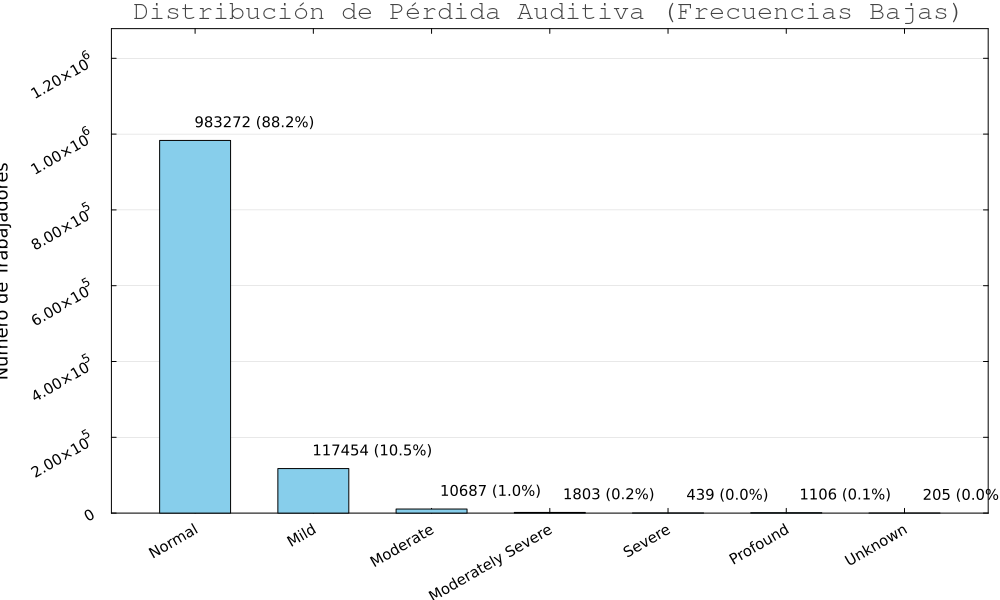

In [35]:
using DataFrames, Statistics, StatsBase, Plots

# Contar las categorías
counts = countmap(df_normalizado.hearing_loss_category)

# Ordenar categorías según la lógica clínica
categorias = ["Normal", "Mild", "Moderate", "Moderately Severe", "Severe", "Profound", "Unknown"]
valores = [get(counts, cat, 0) for cat in categorias]

# Calcular porcentajes
total = sum(values(valores))
porcentajes = round.(valores ./ total .* 100, digits=1)

# Crear gráfico de barras verticales mejorado
bar(
    categorias,
    valores;
    title="Distribución de Pérdida Auditiva (Frecuencias Bajas)",
    xlabel="Categoría de Pérdida Auditiva",
    ylabel="Número de Trabajadores",
    legend=false,
    color=:skyblue,
    linecolor=:black,
    bar_width=0.6,
    size=(1000, 600),   # gráfico más ancho
    ylims=(0, maximum(valores) * 1.3), # espacio extra arriba
    rotation=30,       # rotar etiquetas del eje X
    grid=:y,           # cuadrícula horizontal
    framestyle=:box,   # marco cerrado
    tickfont=font(10), # tamaño fuente de ticks
    guidefont=font(12),
    titlefont=font(14, "Arial"),
)

# Añadir etiquetas de cantidad y porcentaje sobre cada barra
for (i, (count, pct)) in enumerate(zip(valores, porcentajes))
    annotate!(i, count + maximum(valores) * 0.05, text("$(count) ($(pct)%)", :center, 10))
end

display(current())
